The fear of the LORD is the beginning of knowledge, but fools despise wisdom and discipline. Proverbs 1:7

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University


# Chapter 5-4 이진분류를 위한 데이터셋 준비

    5.1 퍼셉트론
    5.2 시그모이드 함수
    5.3 로지스틱 손실함수
    5.4 이진 분류를 위한 데이터셋 준비
    5.5 로지스틱 회귀 뉴론 만들기
    5.6 로지스틱 회귀 뉴론의 단층 신경망 만들기
    5.7 사이킷런으로 로지스틱 회귀 수행하기

## 1. 유방암 데이터셋 

사이킷런에 포함된 '위스콘신 유방암 데이터셋(Wisconsin breast cancer dataset)'을 사용합니다. 여기에는 유방암 세포의 특징 10개에 대하여 평균, 표준 오차, 최대 이상치가 기록되어 있습니다. 여기서 해결할 문제는 데이터 샘플이 악성 종양(True)인지 혹은 정상 종양(False)인지 구분하는 이진 분류 문제입니다. 

여기서 주의할 점은, 의학분야에서는 건강한 종양을 양성 종양이라고 부르고, 건강하지 않은 종양을 악성 종양(음성 종양이 아님)이라고 부릅니다. 그런데, 이진 분류 문제에서는 해결해야 할 목표를 양성 샘플이라고 부릅니다. 지금 해결해야 할 과제가 악성 종양이므로 양성 샘플이 악성 종양인 셈입니다. 양성이라는 긍정적인 단어 때문에 양성 샘플이 양성 종양이라고 착각할 수 있습니다. 그래서, 여기서는 양성 종양 대신 정상 종양이라는 말을 사용합니다. 표로 정리하면 다음과 같습니다. 


|           |  의학               |  이진 분류
|:---------:|:-------------------:|:---------------:|
| 좋음      | 양성 종양(정상)     | 음성 샘플 False |
| 나쁨      | 악성 종양(비정상)   | 양성 샘플 True  |   


## 2 데이터셋 준비하기 

#### 1. load_breast_cancer() 함수 호출하기
이제 사이킷런에서 위스콘신 유방암 데이터셋을 불러옵니다. 유방암 데이터셋을 불러오려면 사이킷런 모듈 아래에 있는 load_breast_cancer()함수를 사용하면 됩니다. 이 함수를 호출하여 Bunch클래스의 객체를 가져옵니다. 


In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#### 2. 입력 데이터 확인하기 

Bunch 클래스로 객체를 만들어 cancer에 저장했으므로, cancer의 data와 target을 살펴보겠습니다. 먼저 입력 데이터인 data의 크기를 알아봅니다. 

In [2]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


cancer에는 569개의 샘플과 30개의 특성이 있다는 것을 알 수 있습니다. 이 중에 처음 3개의 샘플을 출력해봅니다. 

In [3]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

특성 데이터를 살펴보면, 실수 범위의 값이고 양수로 이루어져 있음을 알 수 있습니다. 대괄호 1쌍으로 묶은 것이 샘플입니다. 특성을 세어보면 30개인 것을 확인할 수 있습니다. 산점도로 그려서 표현하기 어려울 것 같습니다. 이번에는 산점도가 아니라 박스플롯(box plot)을 이용하여 각 특성의 사분위(quartile)값을 나타내 보겠습니다. 앞으로 맷플롯립 패키지와 넘파이 패키지는 줄임 표현을 바로 사용하도록 합니다. 

__Note__: Bunch 클래스와 사이킷런의 datasets 관련 정보는 [여기](https://datascienceschool.net/view-notebook/e6bd77468ab345639c6ecccf4a24a838/) 를 참조하십시오. 

__Note__: scikit-learn의 대부분의 샘플 데이터는 Bunch 라는 클래스 객체로 생성됩니다. 이 클래스 객체는 다음과 같은 속성을 가집니다.

- data: (필수) 독립 변수 ndarray 배열
- target: (필수) 종속 변수 ndarray 배열
- feature_names: (옵션) 독립 변수 이름 리스트
- target_names: (옵션) 종속 변수 이름 리스트
- DESCR: (옵션) 자료에 대한 설명

데이터의 특성 이름들을 출력해 보십시오. 

In [8]:
cancer.None

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### 참고 자료: 사분위와 박스 플롯에 대해여 

사분위는 영어로 Quartile이라고 합니다. 농구 혹은 미식축구 경기는 보통 쿼터제로 되어 있는데, 15분씩 4개 쿼터로 진행이 됩니다. 바로 쿼터가 1/4이기 때문입니다. 미화 동전에 쿼터가 있는데, 1불의 4분의 1 즉 25전입니다. 이처럼 사분위는 자료를 크기 순으로 정렬하고 그 자료 본포의 1/4에 해당하는 자료값을 말합니다. 1사분위는 자료의 첫 번째 1/4이고, 2사분위 두 번째 1/4이라는 식입니다. 

그러므로, 중앙값(median)은 2사분위 즉 1/2 지점의 값이 됩니다. 중앙값은 평균과는 다른 개념인 것을 알 수 있습니다. 중앙값은 100명 학생의 성적을 등수로 나열하여 50등 학생의 점수가 중앙값입니다. 그리고, 중앙값에서 상위 25%와 하위 25% 점수를 그린 것이 박스 플롯입니다. 다시 말해, 상위 25%, 하위 25%를 제외한 값들이 박스 안에 표시된 것이며, 박스 플롯 안에서 중앙값(median)이 표시되어 있습니다. 다음 그림을 참고하십시오. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-breast1.png?raw=true" width=600></img>
<center> 그림 1: 사분위와 박스 플롯 </center>

#### 3. 박스 플롯으로 특성의 사분위 관찰하기

박스 플롯은 1사분위(Q1)와 3사분위(Q3) 값으로 상자를 그린 다음, 그 안에 2사분위(중간값, median)값을 표시합니다. 그런 다음, 1사분위와 3사분위 사이 거리(IQR: inter quartile range)의 1.5배만큼 위아래 거리에서 가장 큰 값과 가장 작은 값까지 수염을 그립니다. 


<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-breast2.png?raw=true" width=600></img>
<center> 그림 2: 박스 플롯과 수염 </center>

그러면, 앞에서 얻은 데이터셋를 이용하여 박스 플롯을 그려봅니다 

<function matplotlib.pyplot.show(*args, **kw)>

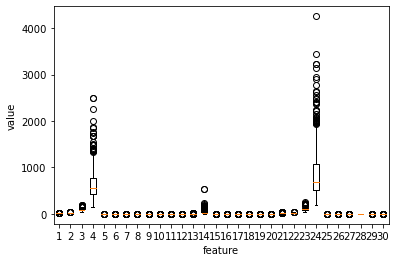

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.boxplot(None)
plt.xlabel(None)
plt.ylabel('value')
plt.show

#### 4. 눈에 띄는 특성 살펴보기

박스 플롯을 보면, 4, 14, 24번째 특성이 다른 특성보다 값의 분포가 훨씬 크다는 것을 알 수 있습니다. 다른 특성과 차이가 나는 특성들을 확인해 볼 필요가 있습니다. 4, 14, 24번째 특성의 인덱스를 리스트로 묶어 전달하면 각 인덱스의 특성을 확인할 수 있습니다. 결과를 관찰해보면 모두 넓이와 관련된 특성입니다. 

In [30]:
cancer.feature_names[None] # 인덱스가 0부터 시작하므로

array(['mean area', 'area error', 'worst area'], dtype='<U23')

#### 타깃 데이터 확인하기 

여러분이 해결할 문제는 '음성 샘플(정상 종양)'과 '양성 샘플(악성 종양)'을 구분하는 이진 분류 문제입니다. 그래서 cancer.targe 배열 안에는 0과 1만 들어 있습니다. 여기서 0은 음성 클래스, 1은 양성 클래스를 의미합니다. 다음은 타깃 데이터를 확인한 것입니다.  넘파이의 unique()함수를 사용하면 고유한 값을 찾아 반환합니다. 이때 return_counts 매개 변수를 True로 지정하면 고유한 값이 등장하는 횟수까지 세어 반환합니다. 


In [11]:
type(cancer.target)

numpy.ndarray

In [31]:
np.unique(None, None)

(array([0, 1]), array([212, 357], dtype=int64))

unique()함수가 반환하는 값을 확인해보면(Use help(np.unique) in code cell for detail), 두 종류의 값을 반환하고 있습니다. 왼쪽의 값은 cancer.target에 들어 있는 고유한 값(0, 1)을 의합니다. 즉, cancer.target에는 0이나 1이라는 값만 들어 있습니다. 음성(0), 양성(1)클래스의 값이므로 당연합니다.  오른쪽 값은 타깃 데이터의 고유한 값의 개수를 센 것을 반환한 것입니다. 즉 위의 타깃 데이터에 212개의 음성 클래스(정상 종양)과 양성 클래스(악성 종양)가 들어 있습니다. 

#### 6. 훈련 데이터셋 저장하기

이제 예제 데이터셋을 x, y변수에 저장합니다. 

In [32]:
x = None
y = None

이제 훈련 데이터셋 준비를 마쳤으니 로지스틱 회귀를 이용하여 모델을 만들 차례입니다. 

## 참고문헌

1. 케라스 창시자에게 배우는 딥러닝, 프랑소와 숄레, 길벗
1. 핸즈온 머신러닝, 오렐리앙 제롱, 한빛미디어
1. 딥러닝 입문, 박해선, 이지스 퍼블리싱
1. 파이썬으로 배우는 기계학습, 김영섭, K-MOOC

-------
__Be joyful always!__ 1 Thes.5:16